In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('From the internet.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [7]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [8]:
df1 = df.drop(['area_type','availability','society','balcony'], axis=1)

In [9]:
df1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [10]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
per = 100*df1.isnull().sum()/len(df1)
per

location      0.007508
size          0.120120
total_sqft    0.000000
bath          0.548048
price         0.000000
dtype: float64

In [12]:
per = per[per>0]
per.sort_values()

location    0.007508
size        0.120120
bath        0.548048
dtype: float64

(0.0, 1.0)

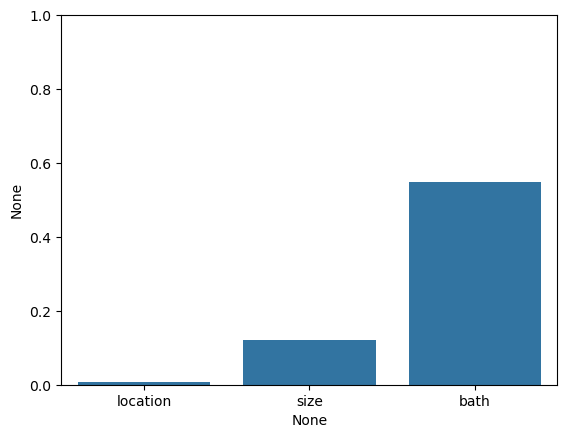

In [13]:
sns.barplot(x = per.index, y=per)
plt.ylim(0,1)

In [14]:
per[per<1]

location    0.007508
size        0.120120
bath        0.548048
dtype: float64

In [15]:
df1[df1['location'].isnull()]

,location,size,total_sqft,bath,price
568,NaN,3 BHK,1600,3.0,86.0


In [16]:
df1[df1['size'].isnull()]

,location,size,total_sqft,bath,price
579,Sarjapur Road,NaN,1200 - 2400,NaN,34.185
1775,IVC Road,NaN,2000 - 5634,NaN,124.000
2264,Banashankari,NaN,2400,NaN,460.000
2809,Sarjapur Road,NaN,1200 - 2400,NaN,28.785
2862,Devanahalli,NaN,1500 - 2400,NaN,46.800
5333,Devanahalli,NaN,2100 - 5405,NaN,177.115
6423,Whitefield,NaN,2324,NaN,26.730
6636,Jigani,NaN,1500,NaN,25.490
6719,Hoskote,NaN,800 - 2660,NaN,28.545
7680,Kasavanhalli,NaN,5000,NaN,400.000


In [17]:
df1[df1['bath'].isnull()].index

Index([   56,    81,   224,   344,   579,   669,   702,   801,   941,  1264,
        1267,  1686,  1724,  1765,  1775,  1852,  2264,  2500,  2563,  2809,
        2862,  2944,  2998,  3370,  3544,  3598,  3862,  4210,  4346,  4843,
        4894,  4995,  5333,  5464,  5498,  5747,  5918,  6256,  6343,  6423,
        6481,  6636,  6719,  6778,  6873,  6971,  7398,  7623,  7680,  7921,
        8020,  8056,  8275,  8289,  8306,  8472,  8565,  8703,  8783,  9129,
        9437,  9699, 10330, 10553, 10634, 10726, 11019, 11297, 11496, 11569,
       12768, 12861, 13240],
      dtype='int64')

In [18]:
df1 = df1.dropna(axis=0, subset=['location','size'])

In [19]:
df1.isnull().sum()

location       0
size           0
total_sqft     0
bath          57
price          0
dtype: int64

In [20]:
df1 = df1.dropna()

In [21]:
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [22]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [23]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [24]:
df1['bedroom'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))

In [25]:
df1.head()

,location,size,total_sqft,bath,price,bedroom
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [26]:
df1['bedroom'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [27]:
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [28]:
def is_float(x):

    try:
        float(x)
    except:
        return False
    return True
        

In [29]:
df1[~df1['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bedroom
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [30]:
def convert_range_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return x
 

In [31]:
df1['total_sqft'] = df1['total_sqft'].apply(convert_range_to_num)

In [32]:
df1[~df1['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bedroom
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.50,1
648,Arekere,9 Bedroom,4125Perch,9.0,265.00,9
775,Basavanagara,1 BHK,1000Sq. Meter,2.0,93.00,1
872,Singapura Village,2 BHK,1100Sq. Yards,2.0,45.00,2
1019,Marathi Layout,1 Bedroom,5.31Acres,1.0,110.00,1
1086,Narasapura,2 Bedroom,30Acres,2.0,29.50,2
1400,Chamrajpet,9 BHK,716Sq. Meter,9.0,296.00,9
1712,Singena Agrahara,3 Bedroom,1500Sq. Meter,3.0,95.00,3
1743,Hosa Road,3 BHK,142.61Sq. Meter,3.0,115.00,3
1821,Sarjapur,3 Bedroom,1574Sq. Yards,3.0,76.00,3


In [33]:
import re

def convert_to_sqft(area_str):

    # Extract the numeric value and unit from the string using regex
    match = re.match(r'(\d+\.?\d*)\s*(sq\.\s*meter|meter|sq\.\s*yards|yards|acres|grounds|guntha|cents|perch)', area_str, re.IGNORECASE)

    if match:
        number = float(match.group(1)) #The numeric value
        #If you don't write anything to convert the value (i.e., you don't use float() or int()), 
        #the value captured by match.group(1) will be a string by default.
        unit = match.group(2) # The unit
        normalized_unit = unit.lower().replace(' ', '') #lowercase and spaces removed

        # Perform conversion based on the unit
        if normalized_unit in ['sq.meter', 'meter']: # Square meter to square feet
            return number*10.7639
        elif normalized_unit in ['sq.yards', 'yards']:# Square yard to square feet
            return number*9
        elif normalized_unit == 'acres': # acres to square feet
            return number* 43560
        elif normalized_unit == 'grounds': # grounds to square feet
            return number*2400
        elif normalized_unit == 'guntha': # guntha to square feet
            return number*435.6
        elif normalized_unit == 'cents': # cent to square feet
            return number*435.6
        elif normalized_unit == 'perch': # perch to square feet
            return number*272.25
        else:
            return 'Unsupported unit'
    else:
        return 'Invalid Format'


In [34]:
area_str = '25 Cents'
converted_area = convert_to_sqft(area_str)
print(f"{area_str} in square feet is: {converted_area}")
            

25 Cents in square feet is: 10890.0


In [35]:
df1['total_sqft'] = df1['total_sqft'].apply(lambda x: convert_to_sqft(x) if not is_float(x) else x)

In [36]:
df1 

,location,size,total_sqft,bath,price,bedroom
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [37]:
df2 = df1.copy()
df2['price_per_sqft'] = df1['price']*100000/df1['total_sqft']

In [38]:
df2

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [39]:
len(df2['location'].unique())

1304

In [40]:
df2.location = df2.location.apply(lambda x: x.strip()) #To remove any extra spaces in the location column entries

In [41]:
location_stats = df2.groupby('location')['location'].agg('count')
location_stats.sort_values(ascending=False)

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [42]:
len(location_stats[location_stats<=10])

1052

In [43]:
location_stats_less_than_10= location_stats[location_stats<=10]
location_stats_less_than_10

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1052, dtype: int64

In [44]:
df2['location']=df2['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [45]:
len(df2[df2['location']=='other'])

2881

In [46]:
count_other = (df2['location'] == 'other').sum()
count_other

2881

In [47]:
df2['location'].value_counts()

location
other                 2881
Whitefield             535
Sarjapur  Road         392
Electronic City        304
Kanakpura Road         266
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: count, Length: 242, dtype: int64

In [48]:
len(df2['location'])

13246

In [49]:
len(df2['location'].unique())

242

In [50]:
unique_datapoints = df2['location'].unique()

if 'other' in unique_datapoints:
    print(1)
else:
    print(0)

1


In [51]:
df2.head()

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


<Axes: xlabel='total_sqft', ylabel='price'>

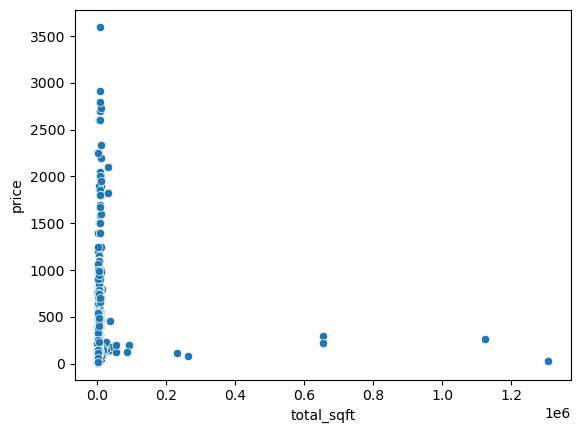

In [52]:
sns.scatterplot(data=df2, x='total_sqft', y='price')

In [53]:
#They say a tipical bedroom is on 300 sqft

df2[df2['total_sqft'] / df2['bedroom'] < 300]

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [54]:
#Typical Sqrt for one bedroom is 300



In [55]:

len(df2[df2['total_sqft'] / df2['bedroom'] < 300])

748

In [56]:
#Now to remove these outliers we are gonna follow a simple way and that would be


df2 = df2[~(df2['total_sqft'] / df2['bedroom'] < 300)]

#Tilda will make true value false... hence all the values less than 300 will be removed from the DataFrame

In [57]:
df2.shape

(12498, 7)

In [58]:
df2['price_per_sqft'].describe()
#Describe method will give us statistical information, in this case on the mentioned column

count     12498.000000
mean       6299.199945
std        4168.905629
min           2.257423
25%        4204.039099
50%        5291.005291
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

## 1 STD Deviation

In [60]:
lower_bound = 6299.199945 - 4168.905629

In [61]:
upper_bound = 6299.199945 + 4168.905629

In [62]:
lower_bound

2130.2943160000004

In [63]:
upper_bound

10468.105574000001

In [64]:
rows_outside_the_std_range = df2[~((df2['price_per_sqft']>= lower_bound)&(df2['price_per_sqft']<=upper_bound))]

In [65]:
rows_outside_the_std_range

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181.818182
11,Whitefield,4 Bedroom,2785.0,5.0,295.0,4,10592.459605
18,other,3 BHK,2770.0,4.0,290.0,3,10469.314079
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571.428571
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250.000000
...,...,...,...,...,...,...,...
13290,Sarjapur Road,4 BHK,4050.0,2.0,450.0,4,11111.111111
13296,Cox Town,2 BHK,1200.0,2.0,140.0,2,11666.666667
13305,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000.000000
13306,other,4 Bedroom,1200.0,5.0,325.0,4,27083.333333


In [66]:
len(rows_outside_the_std_range)

1188

## 2 STD Deviation

In [68]:
lower_bound2 = 6299.199945 - 2*4168.905629
upper_bound2 = 6299.199945 + 2*4168.905629

In [69]:
lower_bound2

-2038.6113129999994

In [70]:
upper_bound2

14637.011203

In [71]:
rows_outside_the_std_range2 = df2[~((df2['price_per_sqft']>= lower_bound2)&(df2['price_per_sqft']<=upper_bound2))]

In [72]:
rows_outside_the_std_range2

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181.818182
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250.000000
133,other,4 Bedroom,1200.0,4.0,210.0,4,17500.000000
159,Mahalakshmi Layout,4 Bedroom,3750.0,4.0,760.0,4,20266.666667
185,other,3 Bedroom,1846.0,3.0,300.0,3,16251.354280
...,...,...,...,...,...,...,...
13247,other,4 Bedroom,1200.0,5.0,325.0,4,27083.333333
13261,other,3 Bedroom,2000.0,2.0,360.0,3,18000.000000
13262,other,2 BHK,1140.0,1.0,185.0,2,16228.070175
13305,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000.000000


In [73]:
len(rows_outside_the_std_range2)

488

## 3 STD Deviation


In [75]:
lower_bound3 = 6299.199945 - 3*4168.905629
upper_bound3 = 6299.199945 + 3*4168.905629

In [76]:
lower_bound3

-6207.516941999998

In [77]:
upper_bound3

18805.916832

In [78]:
rows_outside_the_std_range3 = df2[~((df2['price_per_sqft']>=lower_bound3)&(df2['price_per_sqft']<=upper_bound3))]

In [79]:
len(rows_outside_the_std_range3)

209

In [80]:
#Now we have to do it per location wise because each location can have different price ranges

In [81]:
df3 = df2.copy()

In [82]:
len(df3)

12498

In [83]:
subdf = df3.groupby('location')

In [84]:
m = subdf['price_per_sqft'].agg('mean')
#This is calcuating the mean per category of location 

In [85]:
std = subdf['price_per_sqft'].agg('std')

In [86]:
#df3.groupby('location')['price_per_sqft'].min()

In [87]:
#df3[df3['location'] == '1st Block Jayanagar']['price_per_sqft'].min()

In [88]:
subdf = df3.groupby('location')
m = subdf['price_per_sqft'].agg('mean')
std = subdf['price_per_sqft'].agg('std')

In [89]:
df3 = df3.merge(m, on='location', suffixes=('', '_mean'))
df3 = df3.merge(std, on='location', suffixes=('', '_std'))

In [90]:
#When you merge, pandas performs a "join" on the location column. So, it attaches the mean value for each location to the rows in df2 that have the same location.
#The mean for each location is the same for all rows with that location, so it effectively "propagates" the same mean value for each occurrence of that location in the DataFrame.
#merge jo he wo same mean ko jo 1 category ki he uski sari entries ke sath wahi show karay ga

In [91]:
df3.head()

,location,size,total_sqft,bath,price,bedroom,price_per_sqft,price_per_sqft_mean,price_per_sqft_std
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606,3827.155558,2146.246347
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615,4468.307828,931.340254
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556,4292.084234,1293.269228
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861,6613.525331,714.882318
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000,5483.294629,1606.573738


In [92]:
df3.shape

(12498, 9)

In [93]:
lower_bound = df3['price_per_sqft_mean'] - df3['price_per_sqft_std']
upper_bound = df3['price_per_sqft_mean'] + df3['price_per_sqft_std']


In [94]:
df3[~((df3['price_per_sqft']>=lower_bound) & (df3.price_per_sqft<=upper_bound))]

,location,size,total_sqft,bath,price,bedroom,price_per_sqft,price_per_sqft_mean,price_per_sqft_std
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181.818182,13644.660918,4496.721600
10,Whitefield,4 Bedroom,2785.0,5.0,295.0,4,10592.459605,6210.332292,3227.217990
11,7th Phase JP Nagar,2 BHK,1000.0,2.0,38.0,2,3800.000000,6399.908017,2283.358511
19,Kengeri,1 BHK,600.0,1.0,15.0,1,2500.000000,4419.635239,1407.104197
21,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571.428571,5493.861176,1448.739664
...,...,...,...,...,...,...,...,...,...
12470,Sarjapur Road,4 BHK,4050.0,2.0,450.0,4,11111.111111,6125.438638,2192.939222
12474,Sultan Palaya,4 BHK,2200.0,3.0,80.0,4,3636.363636,5830.593747,1880.854233
12484,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000.000000,6509.520727,5737.010445
12485,other,4 Bedroom,1200.0,5.0,325.0,4,27083.333333,7438.045947,6413.211857


In [95]:
df3 = df3[((df3['price_per_sqft']>=lower_bound) & (df3.price_per_sqft<=upper_bound))]

In [96]:
df3.shape

(10316, 9)

In [97]:
df3 = df3.drop(['price_per_sqft_mean','price_per_sqft_std'], axis=1)

In [98]:
#Combined code of removing outliers per location wise based on 1 std of price_per_sqft

df4 = df2.copy()

sub = df4.groupby('location')
m = sub['price_per_sqft'].agg('mean') 
std = sub['price_per_sqft'].std()

df4 = df4.merge(m, on='location', suffixes=('', '_mean'))
df4 = df4.merge(std, on='location', suffixes=('', '_std'))

lower_bound= df4['price_per_sqft_mean'] - df4['price_per_sqft_std']
upper_bound= df4['price_per_sqft_mean'] + df4['price_per_sqft_std']

df4 = df4[(df4.price_per_sqft>=(df4['price_per_sqft_mean'] - df4['price_per_sqft_std']))&(df4.price_per_sqft<=(df4['price_per_sqft_mean'] + df4['price_per_sqft_std']))]

df4 = df4.drop(['price_per_sqft_mean','price_per_sqft_std'], axis=1)


#2nd method
df5 = df2.copy()

def remove_pps_outliers(df):

    df_out = pd.DataFrame()

    for key,subdf in df.groupby('location'):
        
        m = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)

        reduced_df = subdf[(subdf.price_per_sqft>=(m-std))&(subdf.price_per_sqft<=(m+std))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True) #Here concatination is being done in every iteration thus taking time

    return df_out

df5 = remove_pps_outliers(df5)
df5.shape


#3rd method
df6 = df2.copy()
def remove_pps_outliers(df):

    df_out_list = []

    for key,subdf in df.groupby('location'):
        
        m = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)

        reduced_df = subdf[(subdf.price_per_sqft>=(m-std))&(subdf.price_per_sqft<=(m+std))]
        df_out_list.append(reduced_df)
        
    df_out = pd.concat(df_out_list, ignore_index=True) #Here concatination is being done once, as it's outside the loop
    return df_out

df6 = remove_pps_outliers(df6)
df6.shape



#Method 1 (GroupBy + agg() + merge) is more efficient:
    #It leverages vectorized operations to calculate statistics and merge data.
    #It avoids looping over groups and repeatedly concatenating DataFrames.

#Method 2 (Loop + groupby() + concat) will be slower because:
    #It uses a loop to process each group.
    #It calls pd.concat() repeatedly, which can be inefficient for large DataFrames.
                                                             
#Thus, Method 1 is the preferred choice for larger datasets, and it will typically perform better in terms of speed and memory efficiency.


(10269, 7)

### Now we're gonna see thorugh visualization if the price of 2 bedroom apartment is greater than price of 3 bedroom apartment within same sqft. We will check it in the same location area. 


In [100]:
df7 = df3.copy()
df7.head()

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [101]:
df7.shape

(10316, 7)

In [102]:
def scatter_plot(df, location):

    bed2 = df[(df['location']==location) & (df['bedroom']==2)]
    bed3 = df[(df['location']==location) & (df['bedroom']==3)]
    bed4 = df[(df['location']==location) & (df['bedroom']==4)]

    plt.figure (dpi=400)
    plt.rcParams['figure.figsize'] = (15, 10)
    sns.scatterplot(data= bed2, x= 'total_sqft', y= 'price', color='blue', label='2Bed', s=50)
    sns.scatterplot(data= bed3, x= 'total_sqft', y= 'price', marker='+', color='green', label='3bed', s=50)
    sns.scatterplot(data= bed4, x= 'total_sqft', y= 'price', marker='x', color='red', label='4bed', s=50)

    plt.xlabel('total_sqft')
    plt.ylabel('price')
    plt.legend()
    plt.title('Location')
    


In [103]:
df7[(df7['location']=='Rajaji Nagar')&(df7['bedroom']==2)]

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
2915,Rajaji Nagar,2 BHK,1370.0,2.0,170.0,2,12408.759124
3566,Rajaji Nagar,2 BHK,1718.0,3.0,288.0,2,16763.678696
3855,Rajaji Nagar,2 Bedroom,1200.0,2.0,150.0,2,12500.000000
3865,Rajaji Nagar,2 Bedroom,1160.0,1.0,163.0,2,14051.724138
4044,Rajaji Nagar,2 BHK,1222.0,2.0,112.0,2,9165.302782
4979,Rajaji Nagar,2 BHK,1440.0,2.0,170.0,2,11805.555556
5244,Rajaji Nagar,2 BHK,1440.0,2.0,185.0,2,12847.222222
5933,Rajaji Nagar,2 BHK,1357.0,2.0,130.0,2,9579.955785
7177,Rajaji Nagar,2 BHK,1763.0,3.0,262.0,2,14861.032331
8511,Rajaji Nagar,2 BHK,1268.0,2.0,127.0,2,10015.772871


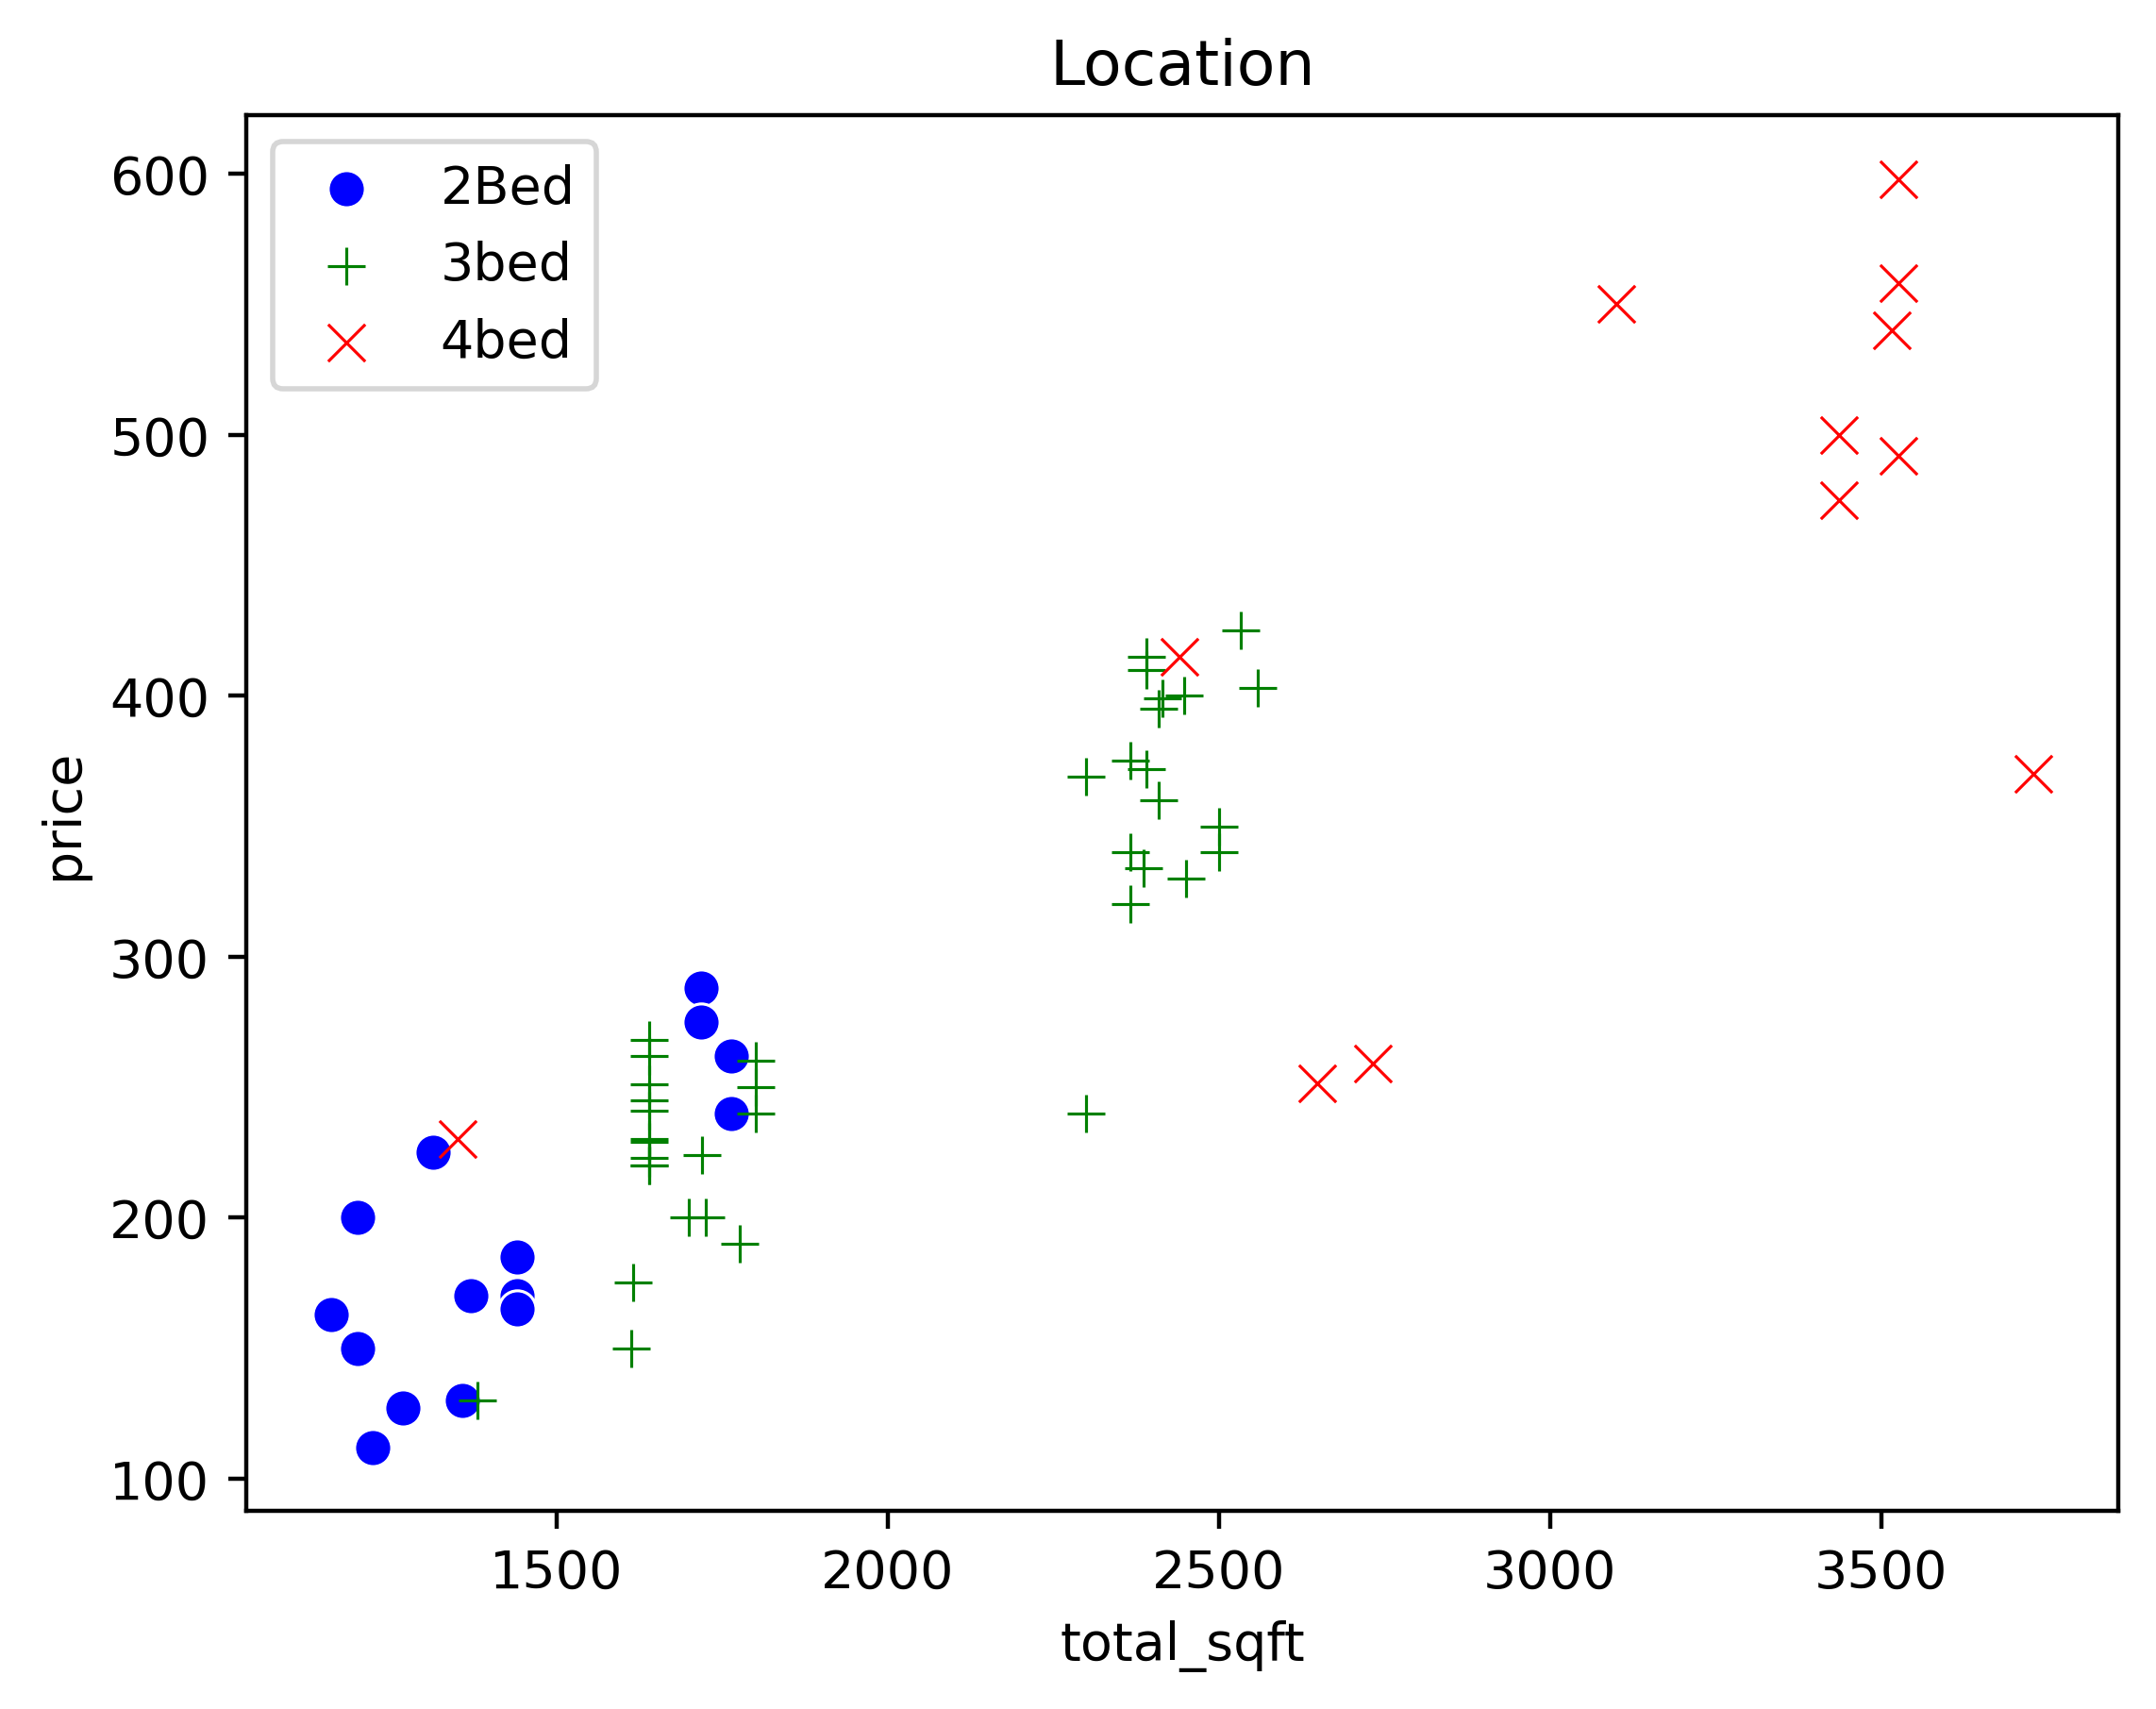

In [104]:
scatter_plot(df7, 'Rajaji Nagar')

### We should also remove properties where for same location, the price of (for example) 3 bedroom apartments is than 2 bedroom apartment (with same square ft area). 
What we will do is for a given location, we will build a dictionary of stats per bedroom i.e

{

‘1’ : { 
 	‘mean’: 4000,
	‘std’: 2000,
	‘count’:34
	},

’2’ : {
 	‘mean’: 4000,
	‘std’: 2000,
	‘count’:34
	},

}

In this way we can remove those 2bedroom apartments whose price_per_sqft is less than mean price_per_Sqft of 1 bedroom apartment

In [106]:
def remove_bedroom_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bedroom_stats={}
        for bedroom, bedroom_df in location_df.groupby('bedroom'):
            bedroom_stats[bedroom] = {
                'mean':np.mean(bedroom_df.price_per_sqft),
                'std':np.std(bedroom_df.price_per_sqft),
                'count':bedroom_df.shape[0]
            }
        for bedroom, bedroom_df in location_df.groupby('bedroom'):
            stats = bedroom_stats.get(bedroom-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bedroom_df[bedroom_df.price_per_sqft<(stats['mean'])].index.values)

    return df.drop(exclude_indices, axis='index')
            
        

In [107]:
df7 = remove_bedroom_outliers(df7)

In [108]:
df7.shape

(7402, 7)

In [109]:
df7.head()

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [110]:
#Now we want to remove outliers where number of bathrooms are greater than number of bedrooms + 2

In [111]:
df8 = df7.copy()

In [112]:
df8[df8['bath']>df8['bedroom']+2]

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
2458,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
7207,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
10658,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
11358,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [113]:
df8 = df8[df8['bath']<df8['bedroom']+2]

In [114]:
df8.shape

(7323, 7)

In [115]:
df8 = df7.drop(['size','price_per_sqft'], axis=1)

In [116]:
df8.head()

,location,total_sqft,bath,price,bedroom
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [117]:
df8.shape

(7402, 5)

In [165]:
df9 = df8.copy()

In [167]:
df9 = df9.drop('location', axis=1)

In [147]:
dummy = df9['location']

In [172]:
get_dummy = pd.get_dummies(dummy, dtype=int, drop_first=True)

In [174]:
df9 = pd.concat([df9, get_dummy], axis=1)

In [178]:
df9.head()

,total_sqft,bath,price,bedroom,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1056.0,2.0,39.07,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,120.00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [176]:
df9.columns

Index(['total_sqft', 'bath', 'price', 'bedroom', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other'],
      dtype='object', length=245)

In [180]:
X = df9.drop('price', axis=1)
y = df9['price']

In [182]:
from sklearn.model_selection import train_test_split

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [186]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [188]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Feature scaling
    ('model', LinearRegression())   # Linear regression model
])
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)


0.6002000151691107

In [190]:
# model = LinearRegression()
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [192]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(pipeline, X, y, cv=cv)

array([  0.68999523,   0.46903796,   0.67401709,   0.64890539,
       -97.76304231])

In [241]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def find_the_best_model_param(X,y):

    param_grid = {
        'LinearRegression':{
            'model': LinearRegression(),
            'params': {
                'model__fit_intercept':[True, False]
            }
        },
        'Lasso':{
            'model':Lasso(max_iter=10000),
            'params':{
                'model__selection':['cyclic', 'random'],
                'model__alpha':[0.1, 1, 10, 100]
            }
        },
        'DecisionTree':{
            'model': DecisionTreeRegressor(),
            'params':{
                'model__criterion' : ["squared_error", "friedman_mse", "absolute_error"],
                'model__splitter': ["best", "random"]
            }
        }
    }


    scores=[]
    cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    #for first level key, second level key in dict.items()
    for model, config in param_grid.items():
        pipeline = Pipeline([
        ('scaler',StandardScaler()),
        ('model',config['model'])
    ])
        grid_model=GridSearchCV(pipeline, config['params'], cv=cv, return_train_score=False)
        grid_model.fit(X,y)

        scores.append({
            'model': model,
            'best_score': grid_model.best_score_,
            'best_params': grid_model.best_params_
        })

    best_model = grid_model.best_estimator_
    
    return pd.DataFrame(scores), best_model
        

In [242]:
scores_df, best_model = find_the_best_model_param(X,y)

In [243]:
scores_df

,model,best_score,best_params
0,LinearRegression,-19.056217,{'model__fit_intercept': True}
1,Lasso,-0.000510,"{'model__alpha': 100, 'model__selection': 'cyc..."
2,DecisionTree,0.782975,"{'model__criterion': 'squared_error', 'model__..."


In [239]:
best_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', DecisionTreeRegressor(criterion='friedman_mse'))])

In [240]:
def predict_price(location, sqft, bath, bedroom):

    loc_index = np.where(X.columns=='location')[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bedroom

    if loc_index >= 0: 
        x[loc_index] = 1

    return grid_model.predict([x])[0]

In [263]:
def predict_price(location, sqft, bath, bedroom, best_model, X):
    # Create a zero array of the same length as X.columns
    x = np.zeros(len(X.columns))

    # Set the features for sqft, bath, and bedroom
    x[0], x[1], x[2] = sqft, bath, bedroom

    # Set the location feature (assuming one-hot encoding and location is a binary column)
    if 'location' in X.columns:
        loc_index = np.where(X.columns == 'location')[0][0]
        x[loc_index] = 1  # Mark the location column (assuming 1 for the location chosen)

        # Create a DataFrame with the same column names as X (the training data).
    input_data = pd.DataFrame([x], columns=X.columns)

    # Predict the price|
    return best_model.predict(input_data)[0]

In [265]:
predict_price('1st Phase JP Nagar', 1000, 2, 2, best_model, X)

50.0

In [207]:
X.columns

Index(['total_sqft', 'bath', 'bedroom', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other'],
      dtype='object', length=244)